In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
nb_vertical = 6
nb_horizontal = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_l = [] # 2d points in left image plane.
imgpoints_r = [] # 2d points in right image plane.

images_l = glob.glob('calibration/left-*.png')
images_r = glob.glob('calibration/right-*.png')
assert images_l
assert images_r
images_l.sort()
images_r.sort()


for fname in images_l:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints_l.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(50)
        
for fname in images_r:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        imgpoints_r.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(50)

cv2.destroyAllWindows()

AssertionError: 

In [3]:
ret, mtx1, dist1, mtx2, dist2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_l, imgpoints_r, None, None, None, None, gray.shape[::-1], flags=cv2.CALIB_RATIONAL_MODEL)
print("retval:", ret)
print("cameraMatrix1:\n", mtx1)
print("cameraMatrix2:\n", mtx2)
print("distCoeffs1:\n", dist1)
print("distCoeffs2:\n", dist2)

retval: 0.5410663714890444
cameraMatrix1:
 [[703.82114344   0.         619.49112591]
 [  0.         703.5002008  371.53285232]
 [  0.           0.           1.        ]]
cameraMatrix2:
 [[701.55549827   0.         649.48277547]
 [  0.         701.62652691 373.35642889]
 [  0.           0.           1.        ]]
distCoeffs1:
 [[-6.97651827e-01  2.46993816e-01 -3.19089913e-04  5.65923406e-04
   8.62861351e-02 -3.56784855e-01 -6.39345815e-02  2.35852877e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
distCoeffs2:
 [[ 1.21611032e+01  4.76334211e+00 -1.26887613e-04  4.16965622e-04
   5.51046003e-02  1.25172199e+01  8.82266338e+00  7.14539189e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


img_l.shape[:2] 720 1280
[[431.01092529   0.         609.63273743]
 [  0.         425.81170654 372.69813505]
 [  0.           0.           1.        ]]
(79, 123, 1121, 480)
img_r.shape[:2] 720 1280
[[418.4468689    0.         662.94998085]
 [  0.         414.85256958 376.9623569 ]
 [  0.           0.           1.        ]]
(98, 132, 1094, 470)


Text(0.5, 1.0, 'Undistorted image')

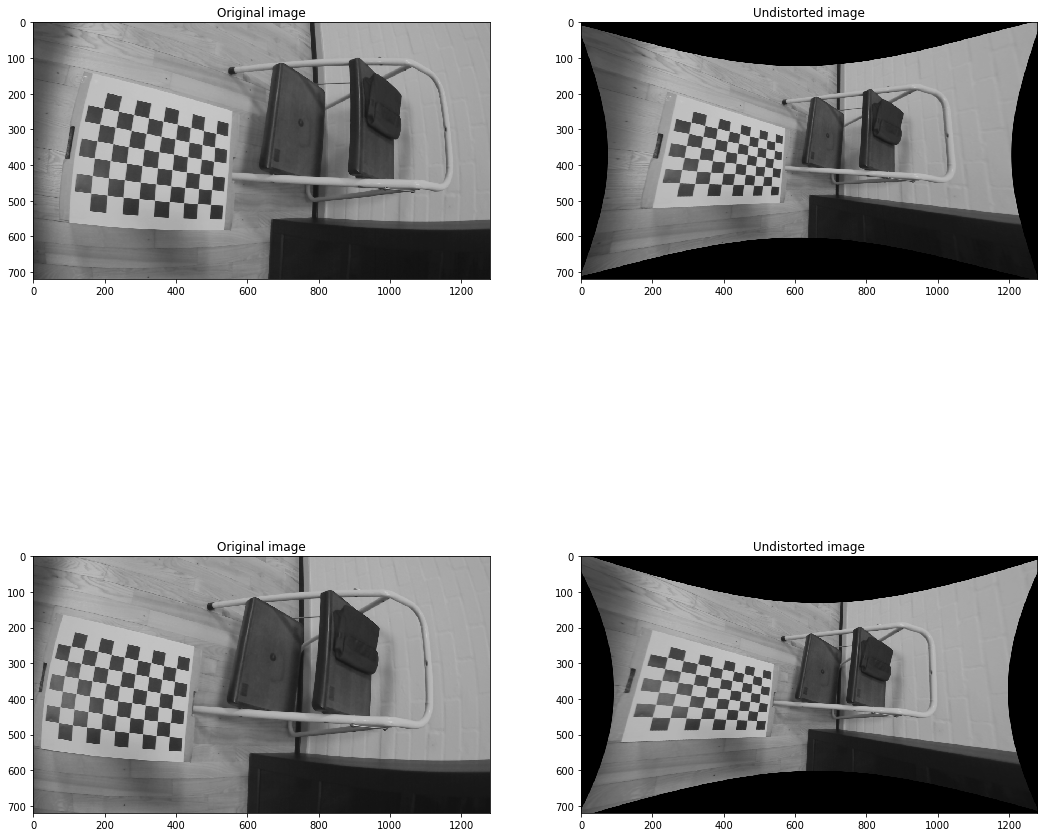

In [4]:
img_l = cv2.imread('calibration/left-0014.png')
h, w = img_l.shape[:2]
print('img_l.shape[:2]', h, w)
newcameramtx_l, roi_l = cv2.getOptimalNewCameraMatrix(mtx1,dist1,(w,h),1)
print(newcameramtx_l)
print(roi_l)

dst_l = cv2.undistort(img_l, mtx1, dist1, None, newcameramtx_l)

img_r = cv2.imread('calibration/right-0014.png')
h, w = img_r.shape[:2]
print('img_r.shape[:2]', h, w)
newcameramtx_r, roi_r = cv2.getOptimalNewCameraMatrix(mtx2,dist2,(w,h),1)
print(newcameramtx_r)
print(roi_r)

dst_r = cv2.undistort(img_r, mtx2, dist2, None, newcameramtx_r)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax[0,0].imshow(img_l[...,[2,1,0]])
ax[0,0].set_title('Original image')
ax[0,1].imshow(dst_l[...,[2,1,0]])
ax[0,1].set_title('Undistorted image')
ax[1,0].imshow(img_r[...,[2,1,0]])
ax[1,0].set_title('Original image')
ax[1,1].imshow(dst_r[...,[2,1,0]])
ax[1,1].set_title('Undistorted image')

(79, 123, 1121, 480)
(98, 132, 1094, 470)


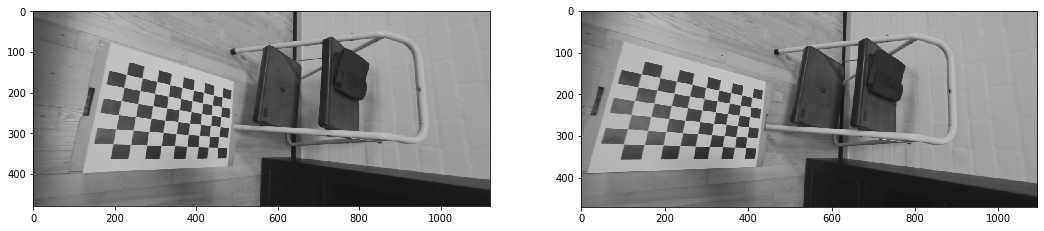

In [5]:
# crop the image
print(roi_l)
x,y,w,h = roi_l
dst_l = dst_l[y:y+h, x:x+w]
print(roi_r)
x,y,w,h = roi_r
dst_r = dst_r[y:y+h, x:x+w]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(dst_l[...,[2,1,0]])
ax[1].imshow(dst_r[...,[2,1,0]])

In [6]:
h, w = img_l.shape[:2]
print('h, w:', h, w)
R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(mtx1, dist1, mtx2, dist2, (w,h), R, T)
print("R1:\n", R1)
print("R2:\n", R2)
print("P1:\n", P1)
print("P2:\n", P2)
print("Q:\n", Q)
print("validPixROI1:\n", validPixROI1)
print("validPixROI2:\n", validPixROI2)

h, w: 720 1280
R1:
 [[ 9.99908283e-01 -3.42706694e-03 -1.31026845e-02]
 [ 3.41948962e-03  9.99993973e-01 -6.00662201e-04]
 [ 1.31046640e-02  5.55802617e-04  9.99913976e-01]]
R2:
 [[ 9.99997744e-01  1.81104784e-03  1.10970296e-03]
 [-1.81169458e-03  9.99998189e-01  5.82074689e-04]
 [-1.10864678e-03 -5.84083819e-04  9.99999215e-01]]
P1:
 [[702.56336386   0.         647.38802338   0.        ]
 [  0.         702.56336386 384.40901947   0.        ]
 [  0.           0.           1.           0.        ]]
P2:
 [[ 7.02563364e+02  0.00000000e+00  6.47388023e+02 -2.50880839e+03]
 [ 0.00000000e+00  7.02563364e+02  3.84409019e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]
Q:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -6.47388023e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -3.84409019e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.02563364e+02]
 [ 0.00000000e+00  0.00000000e+00  2.80038670e-01 -0.00000000e+00]]
validPixROI1:
 (

In [7]:
map1_l, map2_l = cv2.initUndistortRectifyMap(mtx1, dist1, R1, P1, (w,h), cv2.CV_32FC1)
map1_r, map2_r = cv2.initUndistortRectifyMap(mtx2, dist2, R2, P2, (w,h), cv2.CV_32FC1)
print("map1_l shape:\n", map1_l.shape)
print("map2_l shape:\n", map2_l.shape)

map1_l shape:
 (720, 1280)
map2_l shape:
 (720, 1280)


Text(0.5, 1.0, 'Undistorted image')

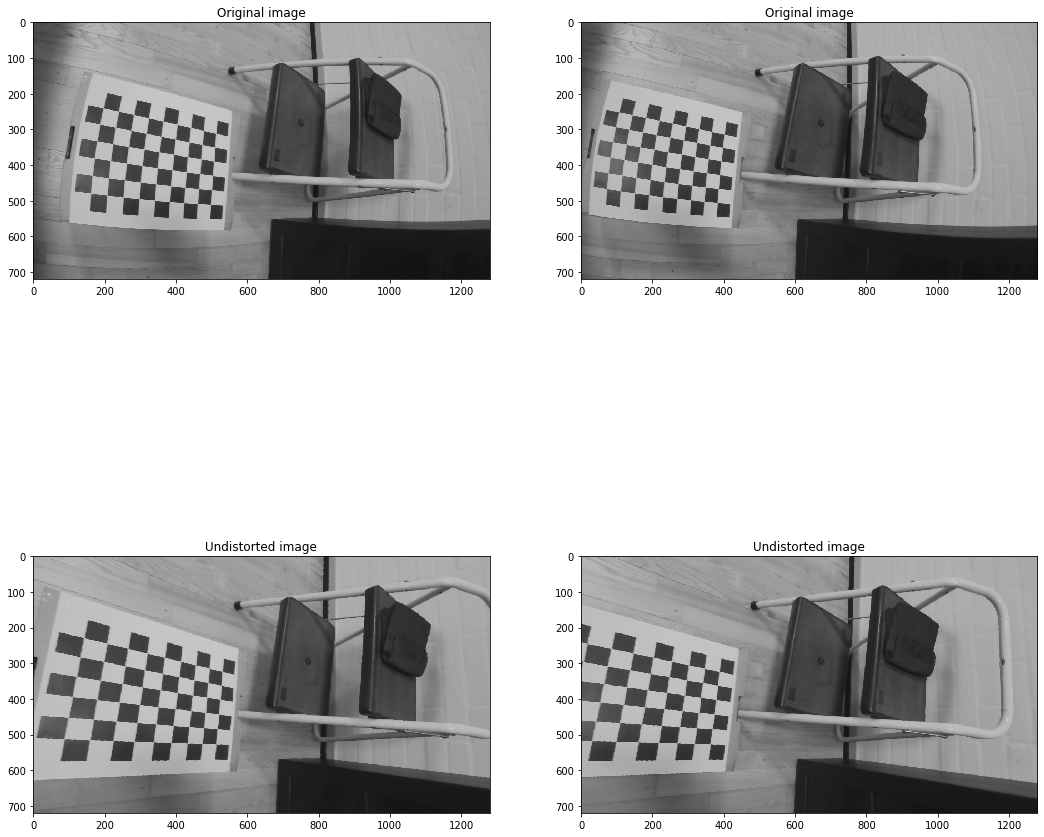

In [8]:
img_l_rect = cv2.remap(img_l, map1_l, map2_l, interpolation=cv2.INTER_NEAREST)
img_r_rect = cv2.remap(img_r, map1_r, map2_r, interpolation=cv2.INTER_NEAREST)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax[0,0].imshow(img_l[...,[2,1,0]])
ax[0,0].set_title('Original image')
ax[0,1].imshow(img_r[...,[2,1,0]])
ax[0,1].set_title('Original image')
ax[1,0].imshow(img_l_rect[...,[2,1,0]])
ax[1,0].set_title('Undistorted image')
ax[1,1].imshow(img_r_rect[...,[2,1,0]])
ax[1,1].set_title('Undistorted image')

In [9]:
with open('newcameramtx_l.npy', 'wb') as f:
    np.save(f, newcameramtx_l)
with open('newcameramtx_r.npy', 'wb') as f:
    np.save(f, newcameramtx_r)

In [25]:
with open('map1_l.npy', 'wb') as f:
    np.save(f, map1_l)
with open('map2_l.npy', 'wb') as f:
    np.save(f, map2_l)
with open('map1_r.npy', 'wb') as f:
    np.save(f, map1_r)
with open('map2_r.npy', 'wb') as f:
    np.save(f, map2_r)